# 先試試看openCV

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

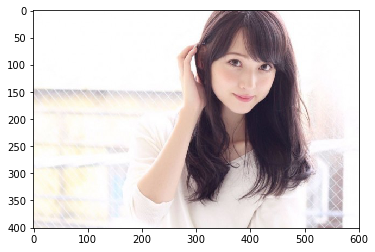

In [61]:
img_path = r'C:\Users\USER\Downloads\trial2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib是RGB，但是opencv是BGR
plt.imshow(img)
plt.show()

In [62]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[246, 239, 229],
        [245, 238, 228],
        [243, 236, 228],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 240, 228],
        [246, 239, 229],
        [244, 237, 227],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 243, 234],
        [245, 241, 232],
        [246, 242, 233],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

# openCV套件:臉部辨識

In [63]:
import numpy as np 
import cv2 

face_cascade = cv2.CascadeClassifier(r'C:\Users\USER\Anaconda3\envs\tensorflow\Library\etc\haarcascades\haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier(r'C:\Users\USER\Anaconda3\envs\tensorflow\Library\etc\haarcascades\haarcascade_eye.xml') 

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Now we find the faces in the image. If faces are found, it returns the positions of detected
#faces as Rect(x,y,w,h). Once we get these locations, we can create a ROI for the face and
#apply eye detection on this ROI (since eyes are always on the face !!! ).

faces = face_cascade.detectMultiScale(gray, 1.3, 5) 

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 進入DICOM

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dicom as pdicom
import os
import glob

%matplotlib inline

In [10]:
import pandas as pd
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

### 請下載dicom 文件並加載到jupyter notebook 中。

In [11]:
INPUT_FOLDER = r'C:\Users\USER\Downloads\CT_image_tutorial\dicom_dir'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

### 現在將DICOM 圖像加載到列表中。

In [14]:
#Collect all dicom images
lstFilesDCM = []

def load_scan2(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if '.dcm' in filename.lower(): #確認是dcm檔案
                lstFilesDCM.append(os.path.join(dirName,filename))
                #print(lstFilesDCM)
    return lstFilesDCM

first_patient = load_scan2(INPUT_FOLDER)
#print(first_patient)

### 第一步：在Jupyter 中進行DICOM 圖像的基本查看操作

### 在第一行加載第一個DICOM 文件來提取元數據，這個文件將賦值為RefDs，其文件名會列在lstFilesDCM 列表的頂端。

In [16]:
# Get ref file
RefDs = pdicom.read_file(lstFilesDCM[0])

# Load dims based on rows, cols, slices(Z-axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM)) #維度跟著row，col，還有Z軸是slices

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]) , float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

### 然後來計算3D NumPy 數組的總維度 = 笛卡爾坐標軸中（每個切片的像素行數x每個切片的像素列數x切片數）。<br/>
### 使用PixelSpacing 和SliceThickness 屬性來計算三個軸之間的像素間距。我們將把數組維度儲存在ConstPixelDims 中，把空間儲存在ConstPixelSpacing

In [17]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0] )
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1] )
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2] )

In [18]:
# The array is based on ConstPixelDims
ArrayDicom = np.zeros(ConstPixelDims, dtype = RefDs.pixel_array.dtype)

# loop through all DICOM files:
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pdicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

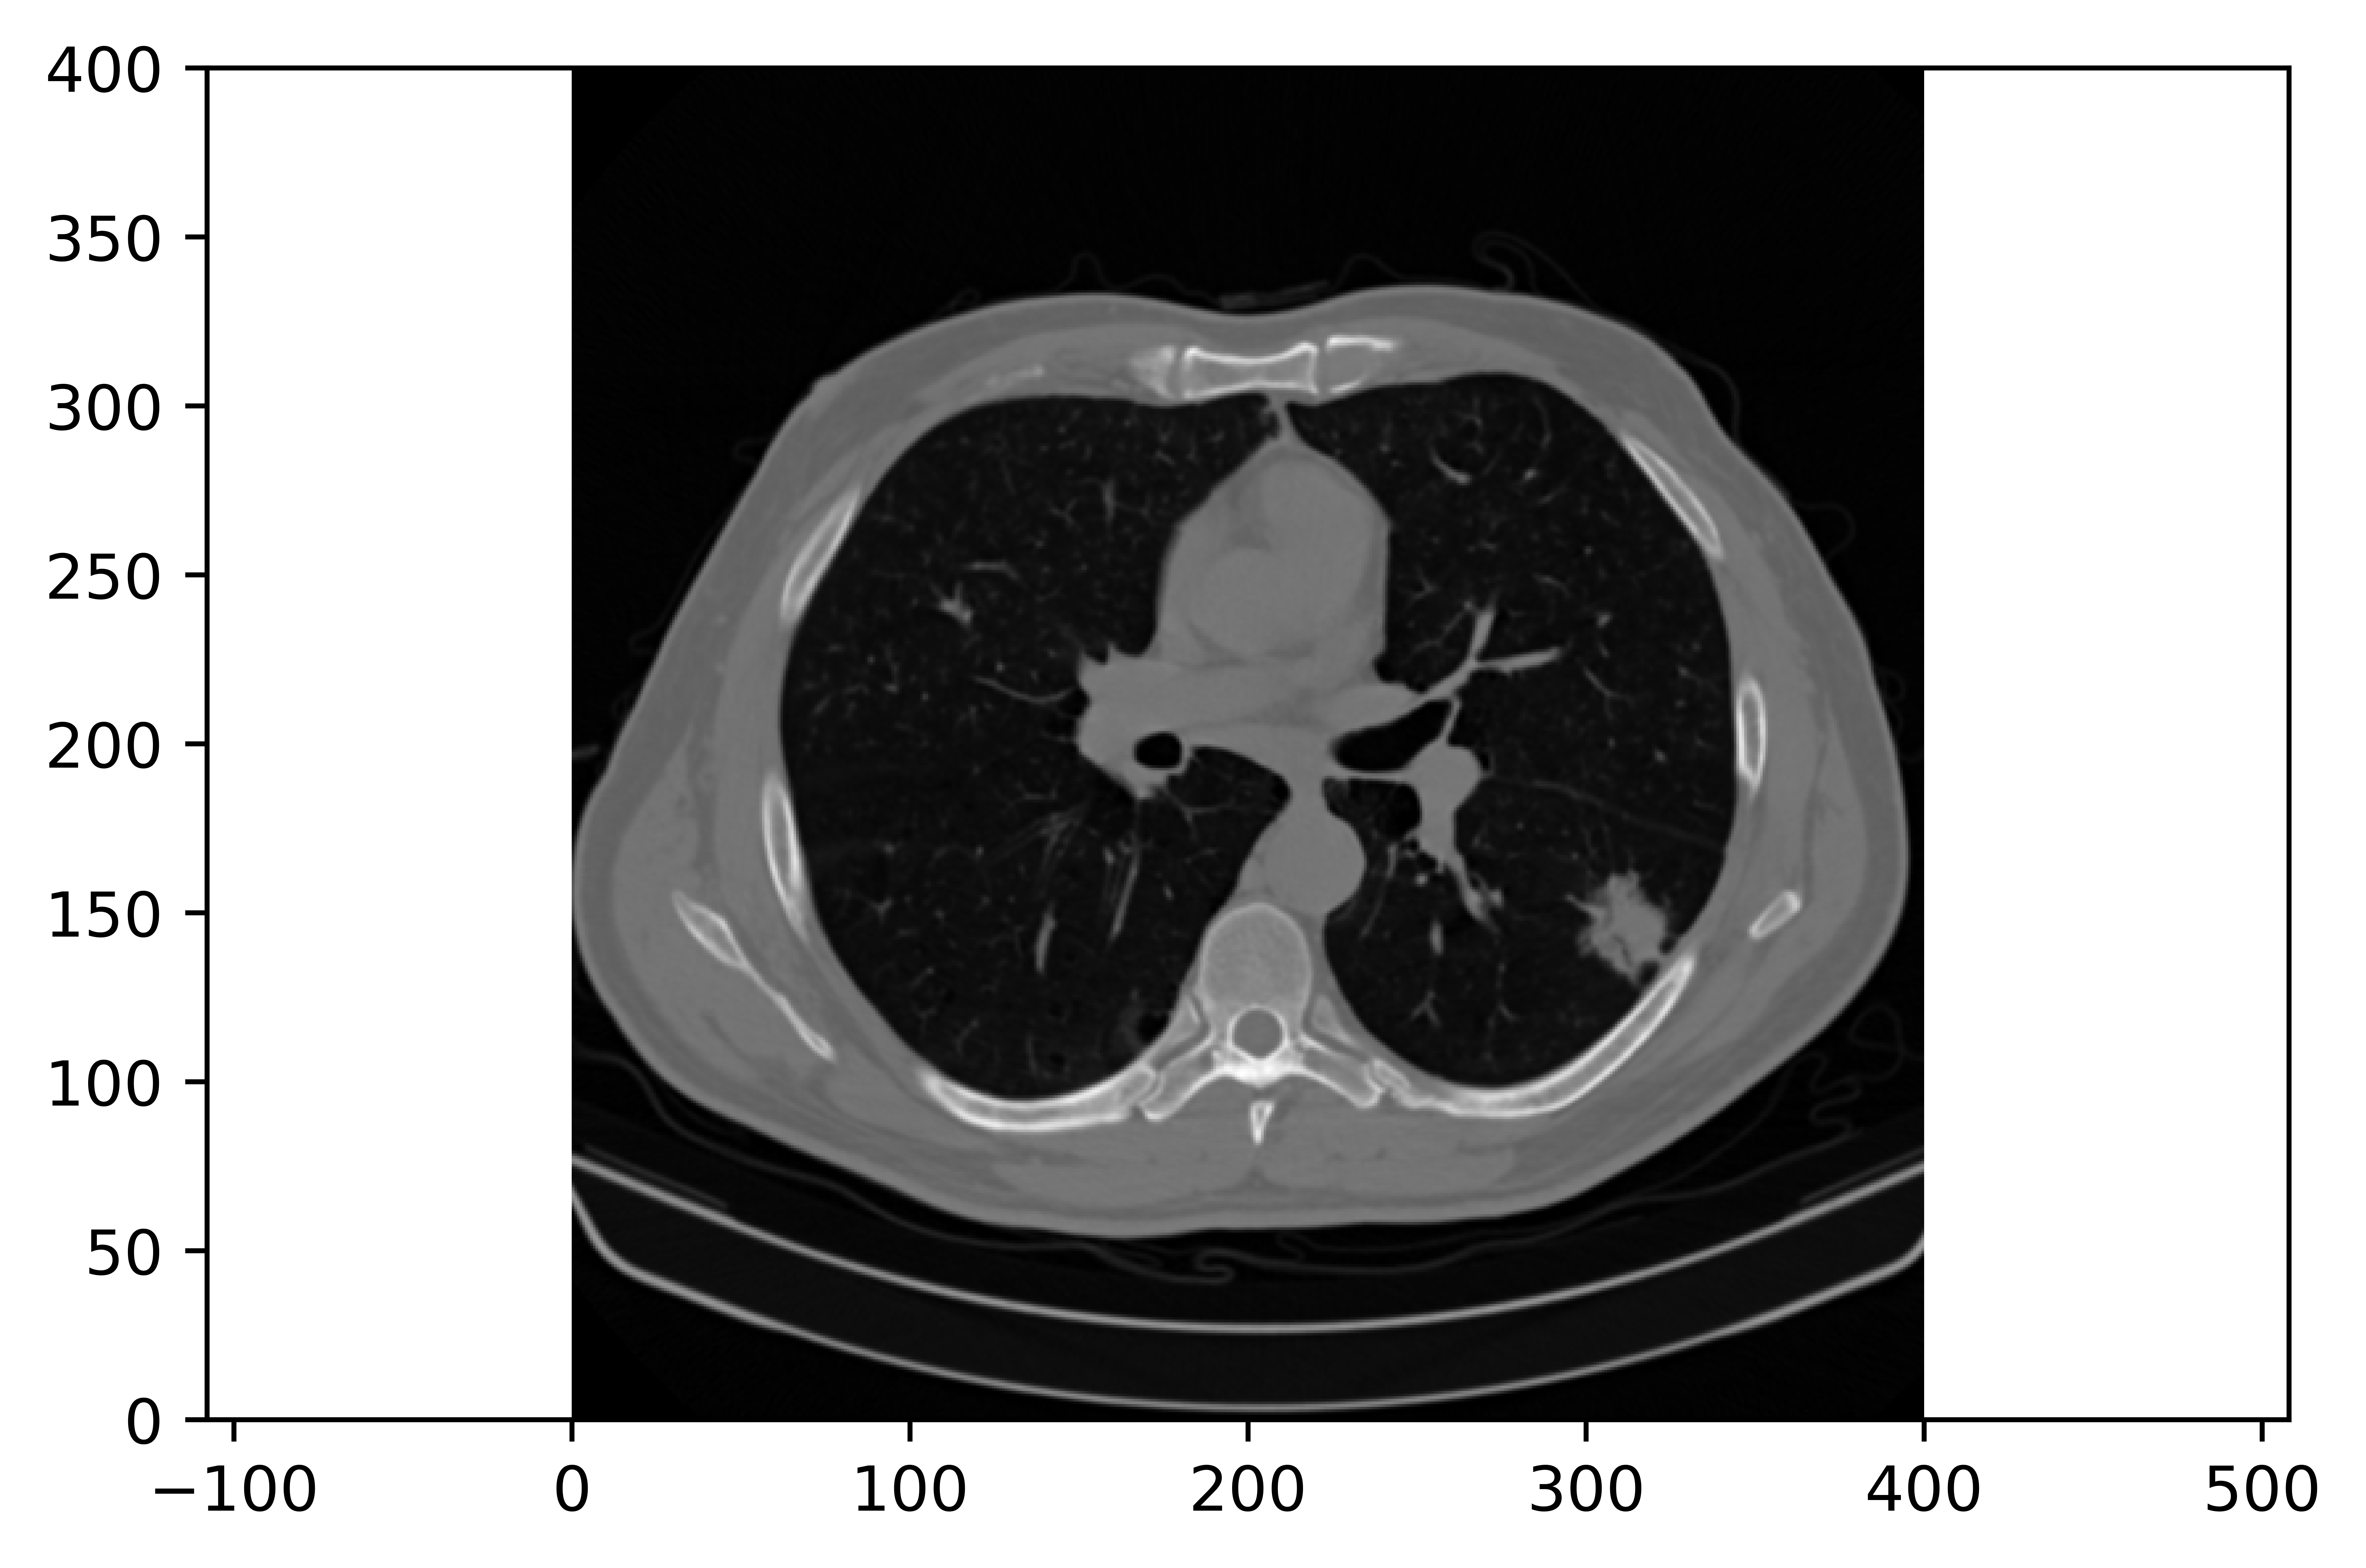

In [23]:
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 99]))

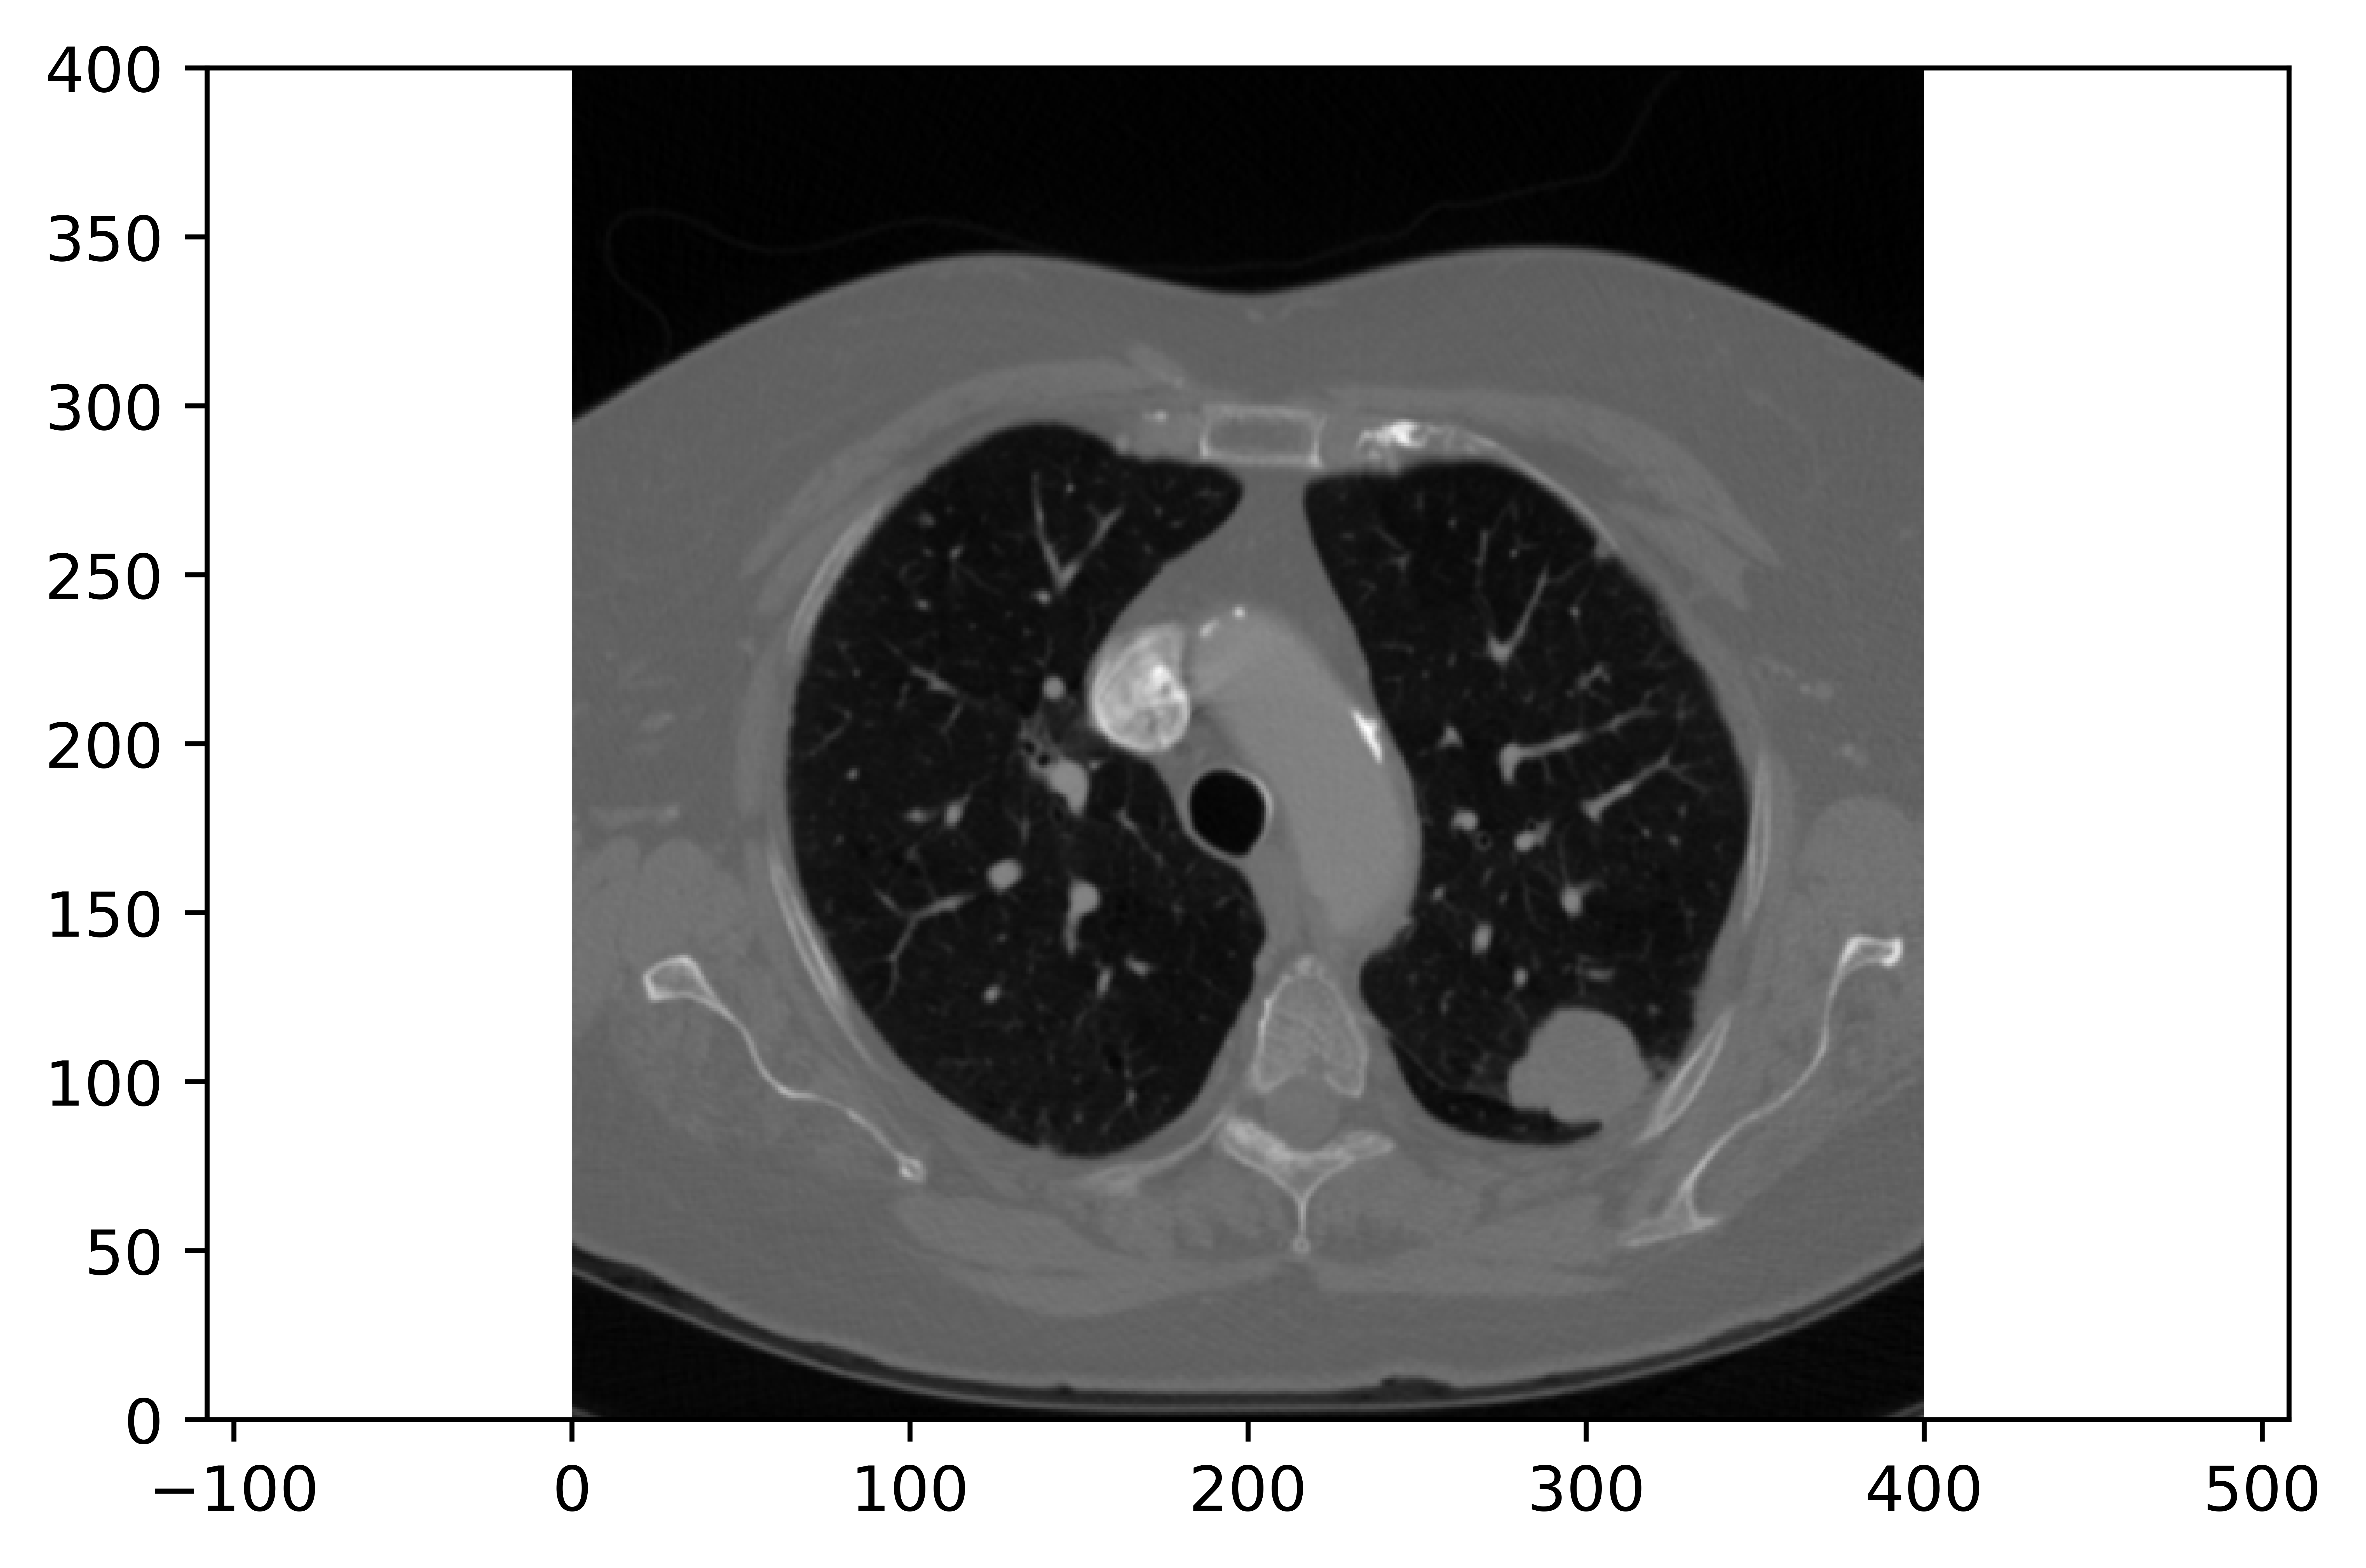

In [36]:
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 2]))

# 第二步：查看DICOM 格式的細節

In [37]:
# 落在邊界外是-2000，要先把他們變成0
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

AttributeError: 'str' object has no attribute 'pixel_array'